<a href="https://colab.research.google.com/github/DeepFluxion/MACK_data-visualization/blob/main/Aula_2_Analise_Vendas_CRISP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Vendas e Faturamento - Metodologia CRISP-DM
## Aplicando Conceitos de Visualização e Percepção Visual

---

## 📚 Introdução

Este notebook demonstra a aplicação completa da metodologia **CRISP-DM** (Cross-Industry Standard Process for Data Mining) em um dataset de vendas e faturamento de uma empresa de tecnologia. Além da análise técnica, exploraremos conceitos fundamentais de **percepção visual** e **princípios Gestalt** para criar visualizações eficazes que comunicam insights de forma clara e impactante.

### Objetivos de Aprendizagem:
1. Aplicar todas as fases do CRISP-DM em um caso prático
2. Demonstrar o poder da visualização de dados na descoberta de insights
3. Aplicar princípios de design e percepção visual
4. Transformar dados brutos em storytelling visual

---

## 🗂️ Descrição do Dataset

### Contexto do Negócio
Estamos analisando dados de uma empresa de tecnologia que comercializa produtos eletrônicos e acessórios em todo o Brasil. A empresa opera em 5 regiões, oferece 5 produtos principais e busca entender melhor seus padrões de vendas para otimizar estratégias comerciais.

### Estrutura dos Dados

O dataset `dataset_vendas_completo.csv` contém **24 meses de dados detalhados** (Janeiro 2023 a Dezembro 2024) com as seguintes características:

#### 📊 Dimensões:
- **Temporal**: Dados mensais cobrindo 2 anos completos
- **Geográfica**: 5 regiões do Brasil (Sul, Sudeste, Centro-Oeste, Nordeste, Norte)
- **Produtos**: 5 produtos principais em 2 categorias
- **Granularidade**: Nível de detalhe mensal por produto/região

#### 📋 Dicionário de Variáveis:

| Coluna | Tipo | Descrição |
|--------|------|-----------|
| `data` | datetime | Primeiro dia de cada mês |
| `ano` | int | Ano (2023-2024) |
| `mes` | int | Número do mês (1-12) |
| `mes_nome` | string | Nome do mês por extenso |
| `trimestre` | string | Trimestre (Q1-Q4) |
| `produto` | string | Nome do produto |
| `categoria` | string | Categoria (Eletrônicos/Acessórios) |
| `regiao` | string | Região do Brasil |
| `quantidade_vendida` | int | Unidades vendidas no período |
| `preco_unitario` | float | Preço de venda unitário (BRL) |
| `faturamento` | float | Receita total (BRL) |
| `custo_unitario` | float | Custo unitário do produto (BRL) |
| `lucro_bruto` | float | Lucro bruto (BRL) |
| `margem_lucro` | float | Margem de lucro (%) |
| `ticket_medio` | float | Valor médio por transação (BRL) |

#### 🛍️ Produtos Comercializados:

**Categoria Eletrônicos:**
- Notebook Pro (R\$ 3.500 preço médio)
- Tablet Smart (R\$ 1.200 preço médio)
- Monitor 4K (R\$ 1.800 preço médio)

**Categoria Acessórios:**
- Fone Wireless (R\$ 250 preço médio)
- Teclado Mecânico (R\$ 450 preço médio)

#### 📈 Características dos Dados:

- **Volume**: ~3.600 registros (24 meses × 5 produtos × 5 regiões × variações)
- **Sazonalidade**: Padrões identificáveis (Black Friday, Natal, volta às aulas)
- **Tendência**: Crescimento orgânico da empresa ao longo do período
- **Qualidade**: Dataset limpo, sem valores nulos, pronto para análise

---

## 🔄 Metodologia CRISP-DM

O CRISP-DM é um modelo de processo padrão para projetos de data mining/ciência de dados, composto por 6 fases:

1. **Business Understanding** (Entendimento do Negócio)
2. **Data Understanding** (Entendimento dos Dados)
3. **Data Preparation** (Preparação dos Dados)
4. **Modeling** (Modelagem)
5. **Evaluation** (Avaliação)
6. **Deployment** (Implantação)

Vamos percorrer cada fase aplicando conceitos de visualização e percepção visual.

---

In [ ]:
## 📦 Configuração do Ambiente

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [ ]:
# Configurações gerais
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [ ]:
# Configuração de estilo para visualizações
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [ ]:
# Definir cores corporativas para consistência visual (Princípio Gestalt: Similaridade)
CORES = {
    'principal': '#2E86AB',
    'secundaria': '#A23B72',
    'sucesso': '#73AB84',
    'alerta': '#F18F01',
    'neutro': '#C4C4C4',
    'destaque': '#C73E1D'
}

print("✅ Ambiente configurado com sucesso!")
print(f"Versão do Pandas: {pd.__version__}")
print(f"Versão do NumPy: {np.__version__}")

✅ Ambiente configurado com sucesso!
Versão do Pandas: 2.2.2
Versão do NumPy: 1.26.4


---

## 1️⃣ FASE 1: Business Understanding (Entendimento do Negócio)

### 1.1 Contexto e Objetivos

A empresa de tecnologia está passando por um momento de expansão e precisa tomar decisões estratégicas baseadas em dados. A diretoria estabeleceu os seguintes objetivos:

#### 🎯 Objetivos Primários:
1. **Maximizar Receita**: Identificar oportunidades de crescimento
2. **Otimizar Mix de Produtos**: Entender quais produtos são mais rentáveis
3. **Expansão Regional**: Avaliar potencial de cada região
4. **Planejamento Sazonal**: Antecipar demandas sazonais

In [ ]:
#### ❓ Perguntas-Chave do Negócio:

# Definindo as perguntas estratégicas que guiarão nossa análise
perguntas_negocio = [
    "1. Qual é a tendência geral de faturamento da empresa?",
    "2. Quais produtos/categorias geram maior receita e lucro?",
    "3. Como o desempenho varia entre as regiões?",
    "4. Existem padrões sazonais que devemos considerar no planejamento?",
    "5. Qual é a evolução da margem de lucro ao longo do tempo?",
    "6. Quais combinações produto-região são mais promissoras?",
    "7. Como otimizar o portfólio de produtos?",
    "8. Onde devemos focar investimentos de marketing?"
]

print("🎯 PERGUNTAS ESTRATÉGICAS DO NEGÓCIO:\n")
for pergunta in perguntas_negocio:
    print(f"   {pergunta}")

🎯 PERGUNTAS ESTRATÉGICAS DO NEGÓCIO:

   1. Qual é a tendência geral de faturamento da empresa?
   2. Quais produtos/categorias geram maior receita e lucro?
   3. Como o desempenho varia entre as regiões?
   4. Existem padrões sazonais que devemos considerar no planejamento?
   5. Qual é a evolução da margem de lucro ao longo do tempo?
   6. Quais combinações produto-região são mais promissoras?
   7. Como otimizar o portfólio de produtos?
   8. Onde devemos focar investimentos de marketing?


In [ ]:
### 1.2 Critérios de Sucesso

# Definir métricas de sucesso mensuráveis
metricas_sucesso = {
    'Crescimento de Receita': 'Aumento de 15% YoY',
    'Margem de Lucro': 'Manter acima de 35%',
    'Penetração Regional': 'Crescer 20% em regiões de baixo desempenho',
    'Eficiência de Portfolio': 'Produtos com ROI > 25%'
}

print("\n📊 MÉTRICAS DE SUCESSO:")
for metrica, objetivo in metricas_sucesso.items():
    print(f"   • {metrica}: {objetivo}")


📊 MÉTRICAS DE SUCESSO:
   • Crescimento de Receita: Aumento de 15% YoY
   • Margem de Lucro: Manter acima de 35%
   • Penetração Regional: Crescer 20% em regiões de baixo desempenho
   • Eficiência de Portfolio: Produtos com ROI > 25%


In [ ]:
## 2️⃣ FASE 2: Data Understanding (Entendimento dos Dados)

### 2.1 Carregamento e Primeira Visualização

# Carregar o dataset
df = pd.read_csv('dataset_vendas_completo.csv')
df['data'] = pd.to_datetime(df['data'])

print("📊 INFORMAÇÕES BÁSICAS DO DATASET")
print("=" * 60)
print(f"Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"Período: {df['data'].min().date()} até {df['data'].max().date()}")
print(f"Memória utilizada: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\n📋 Primeiras 5 linhas:")
df.head(50)

📊 INFORMAÇÕES BÁSICAS DO DATASET
Dimensões: 600 linhas × 15 colunas
Período: 2023-01-01 até 2024-12-01
Memória utilizada: 0.07 MB

📋 Primeiras 5 linhas:


,data,ano,mes,mes_nome,trimestre,produto,categoria,regiao,quantidade_vendida,preco_unitario,faturamento,custo_unitario,lucro_bruto,margem_lucro,ticket_medio
0,2023-01-01,2023,1,January,Q1,Notebook Pro,Eletrônicos,Sul,21,"3,636.03","76,356.64","2,181.62","30,542.66",40.00,"3,636.03"
1,2023-01-01,2023,1,January,Q1,Notebook Pro,Eletrônicos,Sudeste,48,"3,530.05","169,442.53","2,118.03","67,777.01",40.00,"3,530.05"
2,2023-01-01,2023,1,January,Q1,Notebook Pro,Eletrônicos,Centro-Oeste,15,"3,574.88","53,623.25","2,144.93","21,449.30",40.00,"3,574.88"
3,2023-01-01,2023,1,January,Q1,Notebook Pro,Eletrônicos,Nordeste,23,"3,518.38","80,922.63","2,111.03","32,369.05",40.00,"3,518.38"
4,2023-01-01,2023,1,January,Q1,Notebook Pro,Eletrônicos,Norte,7,"3,498.84","24,491.90","2,099.31","9,796.76",40.00,"3,498.84"
5,2023-01-01,2023,1,January,Q1,Tablet Smart,Eletrônicos,Sul,74,"1,215.55","89,950.47",729.33,"35,980.19",40.00,"1,215.55"
6,2023-01-01,2023,1,January,Q1,Tablet Smart,Eletrônicos,Sudeste,141,"1,173.14","165,412.79",703.88,"66,165.12",40.00,"1,173.14"
7,2023-01-01,2023,1,January,Q1,Tablet Smart,Eletrônicos,Centro-Oeste,65,"1,054.61","68,549.81",632.77,"27,419.93",40.00,"1,054.61"
8,2023-01-01,2023,1,January,Q1,Tablet Smart,Eletrônicos,Nordeste,56,"1,152.23","64,524.72",691.34,"25,809.89",40.00,"1,152.23"
9,2023-01-01,2023,1,January,Q1,Tablet Smart,Eletrônicos,Norte,26,"1,241.13","32,269.26",744.68,"12,907.70",40.00,"1,241.13"


In [ ]:
### 2.2 Análise Exploratória Inicial

# Informações sobre tipos de dados e valores nulos
print("\n📊 ESTRUTURA DOS DADOS:")
print("=" * 60)
df.info()

print("\n🔍 VERIFICAÇÃO DE QUALIDADE:")
print(f"Valores nulos: {df.isnull().sum().sum()}")
print(f"Linhas duplicadas: {df.duplicated().sum()}")


📊 ESTRUTURA DOS DADOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data                600 non-null    datetime64[ns]
 1   ano                 600 non-null    int64         
 2   mes                 600 non-null    int64         
 3   mes_nome            600 non-null    object        
 4   trimestre           600 non-null    object        
 5   produto             600 non-null    object        
 6   categoria           600 non-null    object        
 7   regiao              600 non-null    object        
 8   quantidade_vendida  600 non-null    int64         
 9   preco_unitario      600 non-null    float64       
 10  faturamento         600 non-null    float64       
 11  custo_unitario      600 non-null    float64       
 12  lucro_bruto         600 non-null    float64       
 13  margem_lucro        600 no

In [ ]:
### 2.3 Estatísticas Descritivas

# Estatísticas das variáveis numéricas
print("\n📈 ESTATÍSTICAS DESCRITIVAS:")
print("=" * 60)
df[['quantidade_vendida', 'preco_unitario', 'faturamento',
    'lucro_bruto', 'margem_lucro']].describe()


📈 ESTATÍSTICAS DESCRITIVAS:


,quantidade_vendida,preco_unitario,faturamento,lucro_bruto,margem_lucro
count,600.00,600.00,600.00,600.00,600.00
mean,83.32,"1,428.40","72,155.95","28,862.38",40.00
std,78.92,"1,159.71","53,498.81","21,399.52",0.00
min,7.00,209.22,"9,487.97","3,795.19",40.00
25%,33.00,435.13,"32,533.04","13,013.22",40.00
50%,56.00,"1,200.11","58,696.35","23,478.54",40.00
75%,112.00,"1,843.81","91,100.33","36,440.13",40.00
max,527.00,"3,671.74","316,692.26","126,676.90",40.00


In [ ]:
### 2.4 Análise de Dimensões Categóricas

# Explorar variáveis categóricas
print("\n🏷️ ANÁLISE DE CATEGORIAS:")
print("=" * 60)

categoricas = ['produto', 'categoria', 'regiao', 'trimestre']
for col in categoricas:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())


🏷️ ANÁLISE DE CATEGORIAS:

PRODUTO:
produto
Notebook Pro        120
Tablet Smart        120
Fone Wireless       120
Monitor 4K          120
Teclado Mecânico    120
Name: count, dtype: int64

CATEGORIA:
categoria
Eletrônicos    360
Acessórios     240
Name: count, dtype: int64

REGIAO:
regiao
Sul             120
Sudeste         120
Centro-Oeste    120
Nordeste        120
Norte           120
Name: count, dtype: int64

TRIMESTRE:
trimestre
Q1    150
Q2    150
Q3    150
Q4    150
Name: count, dtype: int64


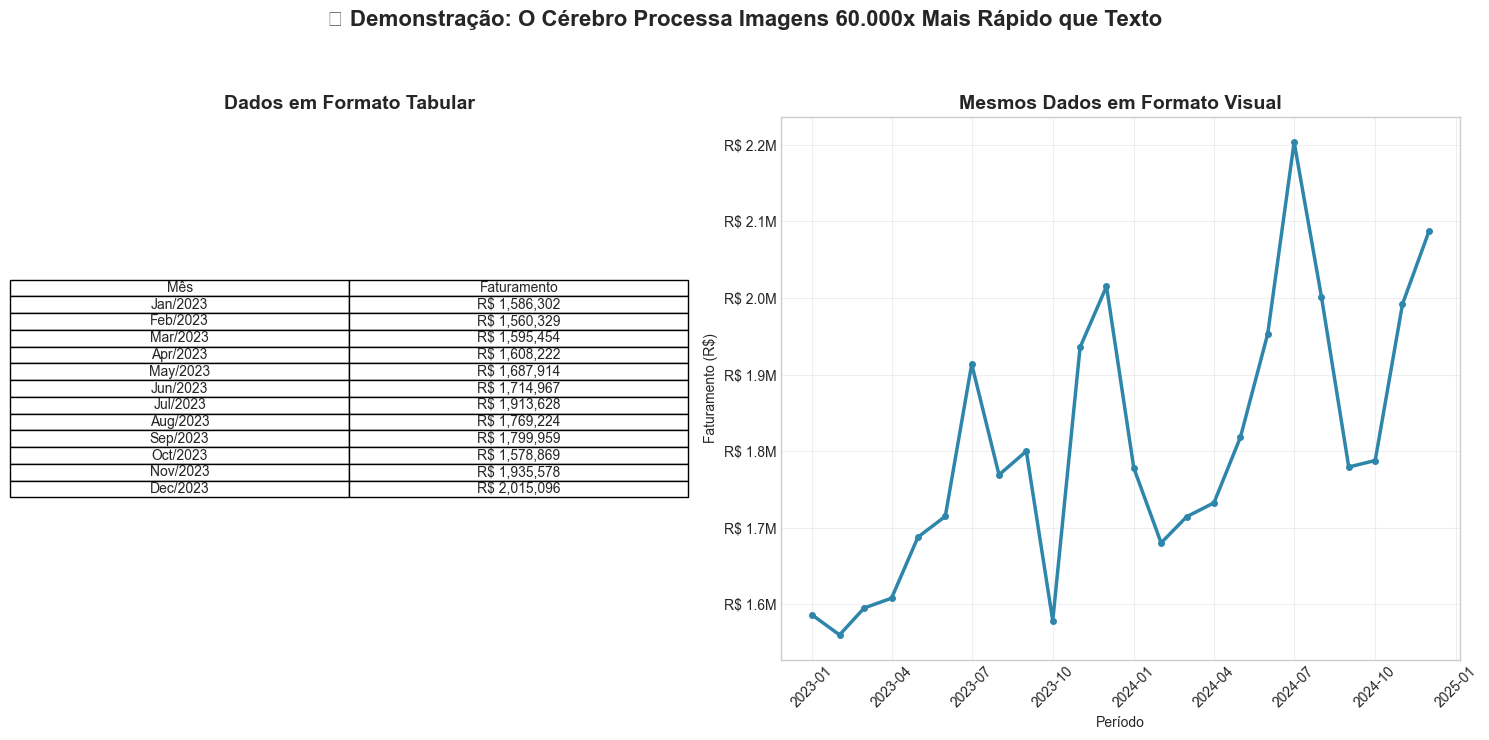


🧠 INSIGHT: Note como o gráfico revela instantaneamente:
   • Tendência crescente ao longo do tempo
   • Padrões sazonais (picos e vales)
   • Magnitude das variações
   → Informações que levam muito mais tempo para extrair da tabela!


In [ ]:
### 2.5 Primeira Visualização: O Poder da Percepção Visual

# Demonstração: Tabela vs Gráfico (Conceito de Processamento Visual Rápido)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Agregar dados mensais
vendas_mensais = df.groupby('data')['faturamento'].sum().reset_index()

# Subplot 1: Tabela
ax1.axis('tight')
ax1.axis('off')
tabela_display = vendas_mensais.head(12).copy()
tabela_display['faturamento'] = tabela_display['faturamento'].apply(lambda x: f'R$ {x:,.0f}')
tabela_display['data'] = tabela_display['data'].dt.strftime('%b/%Y')
table = ax1.table(cellText=tabela_display.values,
                  colLabels=['Mês', 'Faturamento'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
ax1.set_title('Dados em Formato Tabular', fontsize=14, fontweight='bold')

# Subplot 2: Gráfico de Linha
ax2.plot(vendas_mensais['data'], vendas_mensais['faturamento'],
         linewidth=2.5, color=CORES['principal'], marker='o', markersize=4)
ax2.set_title('Mesmos Dados em Formato Visual', fontsize=14, fontweight='bold')
ax2.set_xlabel('Período')
ax2.set_ylabel('Faturamento (R$)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Formatar eixo Y
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1e6:.1f}M'))

plt.suptitle('💡 Demonstração: O Cérebro Processa Imagens 60.000x Mais Rápido que Texto',
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("\n🧠 INSIGHT: Note como o gráfico revela instantaneamente:")
print("   • Tendência crescente ao longo do tempo")
print("   • Padrões sazonais (picos e vales)")
print("   • Magnitude das variações")
print("   → Informações que levam muito mais tempo para extrair da tabela!")

In [ ]:
## 3️⃣ FASE 3: Data Preparation (Preparação dos Dados)

### 3.1 Criação de Novas Features

# Criar features adicionais para análise mais rica
print("🔧 ENGENHARIA DE FEATURES")
print("=" * 60)

# Features temporais
df['ano_mes'] = df['data'].dt.to_period('M')
df['dia_semana'] = df['data'].dt.dayofweek
df['semestre'] = df['data'].dt.month.apply(lambda x: 'S1' if x <= 6 else 'S2')
df['ano_semestre'] = df['ano'].astype(str) + '-' + df['semestre']

# Features de negócio
df['receita_por_unidade'] = df['faturamento'] / df['quantidade_vendida']
df['roi'] = ((df['lucro_bruto'] / (df['custo_unitario'] * df['quantidade_vendida'])) * 100).round(2)

# Classificação de desempenho
df['classe_faturamento'] = pd.qcut(df['faturamento'],
                                   q=4,
                                   labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

print(f"✅ Novas features criadas: {len(df.columns) - 15}")
print(f"✅ Total de features disponíveis: {len(df.columns)}")

🔧 ENGENHARIA DE FEATURES
✅ Novas features criadas: 7
✅ Total de features disponíveis: 22


In [ ]:
### 3.2 Agregações Úteis

# Criar diferentes níveis de agregação
print("\n📊 CRIANDO AGREGAÇÕES")
print("=" * 60)

# Agregação mensal
df_mensal = df.groupby(['data', 'ano', 'mes', 'mes_nome']).agg({
    'faturamento': 'sum',
    'quantidade_vendida': 'sum',
    'lucro_bruto': 'sum',
    'margem_lucro': 'mean'
}).reset_index()

# Agregação por produto
df_produto = df.groupby('produto').agg({
    'faturamento': 'sum',
    'quantidade_vendida': 'sum',
    'lucro_bruto': 'sum',
    'margem_lucro': 'mean',
    'preco_unitario': 'mean'
}).reset_index()

# Agregação por região
df_regiao = df.groupby('regiao').agg({
    'faturamento': 'sum',
    'quantidade_vendida': 'sum',
    'lucro_bruto': 'sum'
}).reset_index()

# Agregação produto-região (matriz)
df_produto_regiao = df.groupby(['produto', 'regiao']).agg({
    'faturamento': 'sum'
}).reset_index()

print(f"✅ Agregação Mensal: {len(df_mensal)} registros")
print(f"✅ Agregação por Produto: {len(df_produto)} registros")
print(f"✅ Agregação por Região: {len(df_regiao)} registros")
print(f"✅ Matriz Produto-Região: {len(df_produto_regiao)} registros")


📊 CRIANDO AGREGAÇÕES
✅ Agregação Mensal: 24 registros
✅ Agregação por Produto: 5 registros
✅ Agregação por Região: 5 registros
✅ Matriz Produto-Região: 25 registros


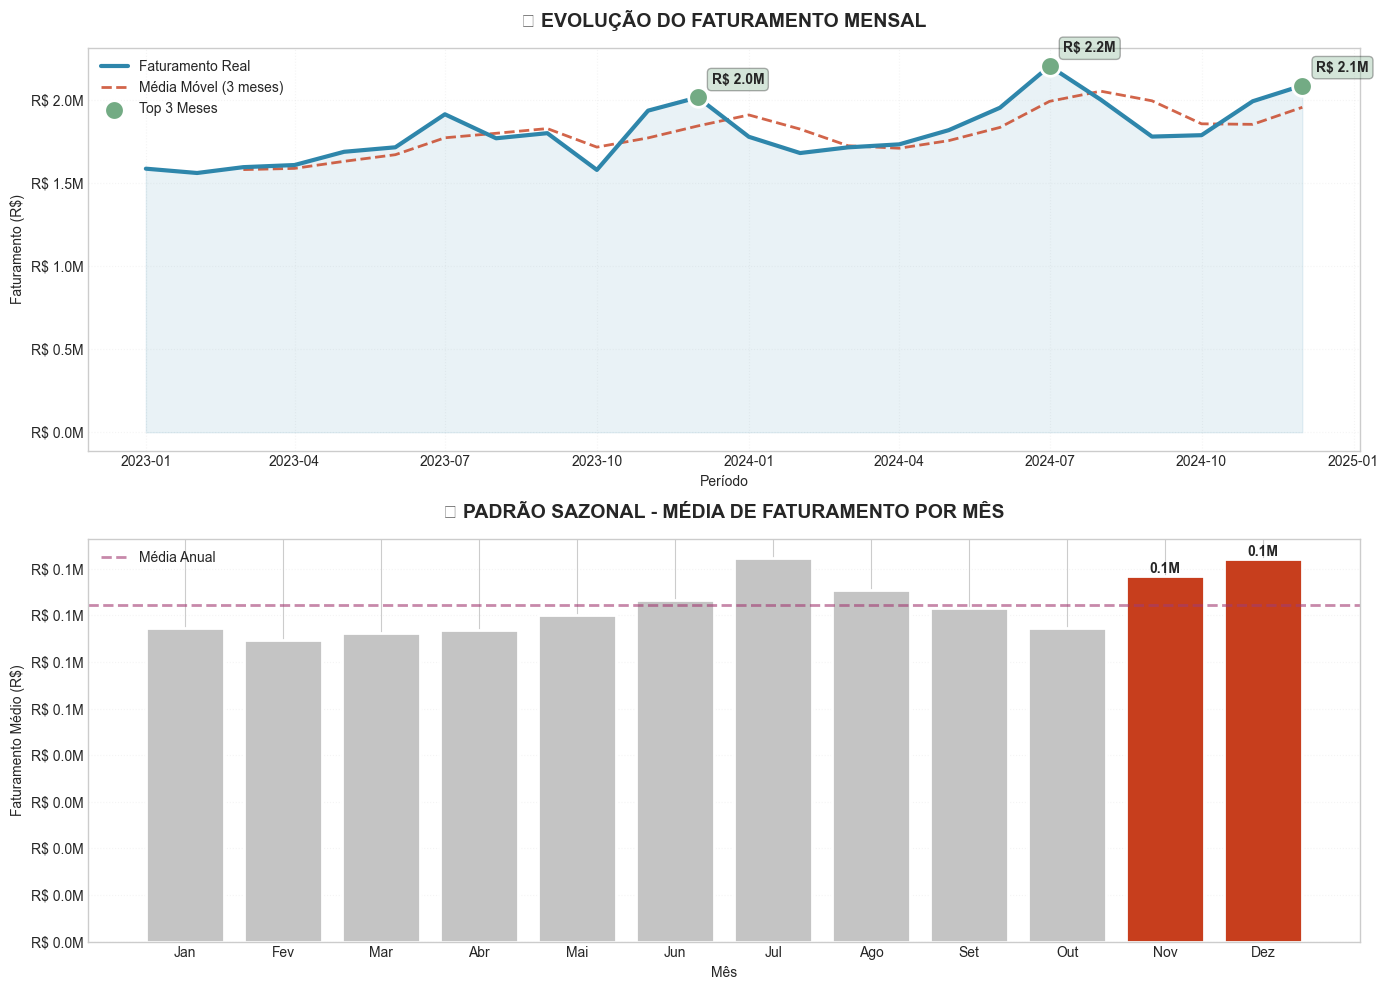


💡 INSIGHTS DA ANÁLISE TEMPORAL:
   • Crescimento total no período: 31.6%
   • Mês de maior faturamento: July/2024
   • Faturamento médio mensal: R$ 1.80M
   • Impacto da sazonalidade: Nov-Dez representam 18.5% do faturamento anual


In [ ]:
## 4️⃣ FASE 4: Modeling (Análise e Visualização)

### 4.1 Análise de Tendência Temporal

# Aplicando Princípios de Design: Hierarquia Visual e Cores Estratégicas
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Faturamento com Tendência
ax1 = axes[0]
vendas_mensais = df.groupby('data')['faturamento'].sum().reset_index()

# Linha principal (Atributo pré-atentivo: COR e ESPESSURA)
ax1.plot(vendas_mensais['data'], vendas_mensais['faturamento'],
         linewidth=3, color=CORES['principal'], label='Faturamento Real', zorder=3)

# Adicionar média móvel para mostrar tendência
vendas_mensais['media_movel'] = vendas_mensais['faturamento'].rolling(window=3).mean()
ax1.plot(vendas_mensais['data'], vendas_mensais['media_movel'],
         linewidth=2, color=CORES['destaque'], linestyle='--',
         label='Média Móvel (3 meses)', alpha=0.8, zorder=2)

# Destacar meses de pico (Atributo pré-atentivo: TAMANHO e COR)
picos = vendas_mensais.nlargest(3, 'faturamento')
ax1.scatter(picos['data'], picos['faturamento'],
           s=200, color=CORES['sucesso'], zorder=4,
           label='Top 3 Meses', edgecolors='white', linewidth=2)

# Anotações para contexto
for _, row in picos.iterrows():
    ax1.annotate(f"R$ {row['faturamento']/1e6:.1f}M",
                xy=(row['data'], row['faturamento']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=CORES['sucesso'], alpha=0.3))

ax1.set_title('📈 EVOLUÇÃO DO FATURAMENTO MENSAL', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Período')
ax1.set_ylabel('Faturamento (R$)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1e6:.1f}M'))
ax1.grid(True, alpha=0.2, linestyle=':')
ax1.legend(loc='upper left')

# Adicionar área sombreada para mostrar crescimento (Princípio Gestalt: Fechamento)
ax1.fill_between(vendas_mensais['data'], 0, vendas_mensais['faturamento'],
                 alpha=0.1, color=CORES['principal'])

# Gráfico 2: Análise de Sazonalidade
ax2 = axes[1]
vendas_por_mes = df.groupby('mes')['faturamento'].mean().reset_index()
meses_nome = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
              'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

barras = ax2.bar(range(1, 13), vendas_por_mes['faturamento'],
                 color=CORES['neutro'], edgecolor='white', linewidth=2)

# Destacar meses de alta temporada (Atributo pré-atentivo: COR)
meses_destaque = [11, 12]  # Black Friday e Natal
for i, barra in enumerate(barras):
    if i+1 in meses_destaque:
        barra.set_color(CORES['destaque'])
        barra.set_edgecolor('white')
        # Adicionar label
        altura = barra.get_height()
        ax2.text(barra.get_x() + barra.get_width()/2., altura,
                f'{altura/1e6:.1f}M',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_title('📊 PADRÃO SAZONAL - MÉDIA DE FATURAMENTO POR MÊS',
             fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Mês')
ax2.set_ylabel('Faturamento Médio (R$)')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(meses_nome)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1e6:.1f}M'))
ax2.axhline(y=vendas_por_mes['faturamento'].mean(),
           color=CORES['secundaria'], linestyle='--',
           linewidth=2, alpha=0.6, label='Média Anual')
ax2.legend()
ax2.grid(True, alpha=0.2, axis='y', linestyle=':')

plt.tight_layout()
plt.show()

# Insights
crescimento = ((vendas_mensais['faturamento'].iloc[-1] / vendas_mensais['faturamento'].iloc[0]) - 1) * 100
print("\n💡 INSIGHTS DA ANÁLISE TEMPORAL:")
print(f"   • Crescimento total no período: {crescimento:.1f}%")
print(f"   • Mês de maior faturamento: {vendas_mensais.loc[vendas_mensais['faturamento'].idxmax(), 'data'].strftime('%B/%Y')}")
print(f"   • Faturamento médio mensal: R$ {vendas_mensais['faturamento'].mean()/1e6:.2f}M")
print(f"   • Impacto da sazonalidade: Nov-Dez representam {(vendas_por_mes.loc[vendas_por_mes['mes'].isin([11,12]), 'faturamento'].sum() / vendas_por_mes['faturamento'].sum() * 100):.1f}% do faturamento anual")

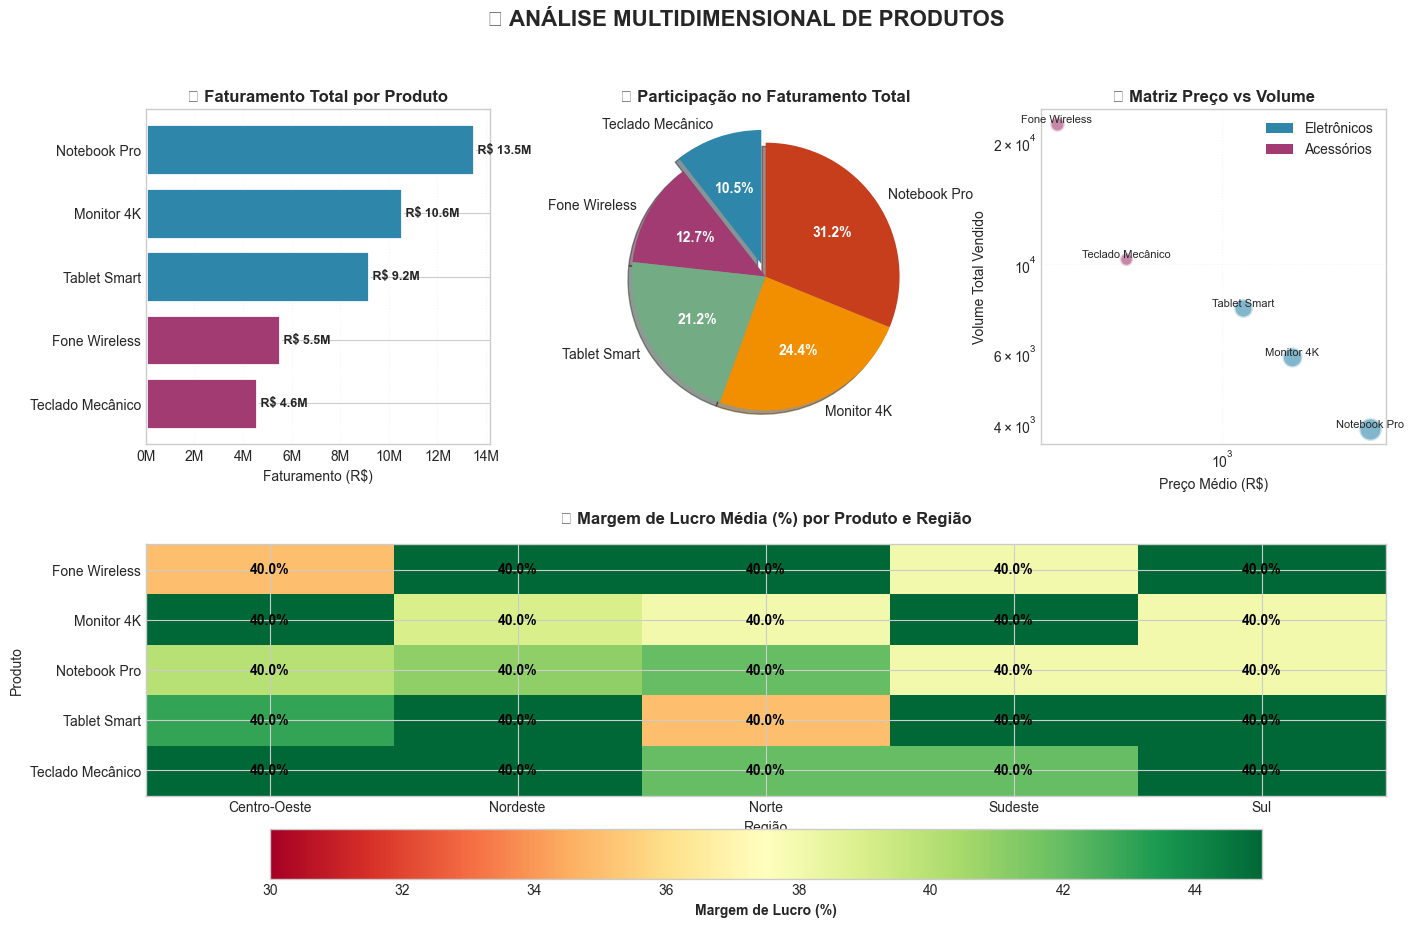


📈 ANÁLISE DE PRODUTOS - PRINCIPAIS MÉTRICAS:

Fone Wireless:
   • Faturamento: R$ 5.51M
   • Volume: 22,158 unidades
   • Margem Média: 40.0%
   • Preço Médio: R$ 248.67
   • ROI Estimado: 66.7%

Monitor 4K:
   • Faturamento: R$ 10.56M
   • Volume: 5,884 unidades
   • Margem Média: 40.0%
   • Preço Médio: R$ 1796.03
   • ROI Estimado: 66.7%

Notebook Pro:
   • Faturamento: R$ 13.49M
   • Volume: 3,904 unidades
   • Margem Média: 40.0%
   • Preço Médio: R$ 3460.84
   • ROI Estimado: 66.7%

Tablet Smart:
   • Faturamento: R$ 9.17M
   • Volume: 7,776 unidades
   • Margem Média: 40.0%
   • Preço Médio: R$ 1190.59
   • ROI Estimado: 66.7%

Teclado Mecânico:
   • Faturamento: R$ 4.57M
   • Volume: 10,269 unidades
   • Margem Média: 40.0%
   • Preço Médio: R$ 445.86
   • ROI Estimado: 66.7%


In [ ]:
### 4.2 Análise de Produtos - Aplicando Princípios Gestalt

# Criar visualização com múltiplos elementos usando Princípios Gestalt
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Gráfico de Barras - Faturamento por Produto (Princípio: Similaridade)
ax1 = fig.add_subplot(gs[0, 0])
df_produto_sorted = df_produto.sort_values('faturamento', ascending=True)
cores_barras = [CORES['principal'] if cat == 'Eletrônicos' else CORES['secundaria']
                for cat in df.groupby('produto')['categoria'].first()[df_produto_sorted['produto']]]

barras = ax1.barh(df_produto_sorted['produto'], df_produto_sorted['faturamento'],
                  color=cores_barras, edgecolor='white', linewidth=2)

# Adicionar valores nas barras
for i, (produto, valor) in enumerate(zip(df_produto_sorted['produto'], df_produto_sorted['faturamento'])):
    ax1.text(valor, i, f' R$ {valor/1e6:.1f}M',
            va='center', fontweight='bold', fontsize=9)

ax1.set_title('💰 Faturamento Total por Produto', fontsize=12, fontweight='bold')
ax1.set_xlabel('Faturamento (R$)')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
ax1.grid(True, alpha=0.2, axis='x', linestyle=':')

# 2. Gráfico de Pizza - Participação no Faturamento (Princípio: Fechamento)
ax2 = fig.add_subplot(gs[0, 1])
cores_pizza = [CORES['principal'], CORES['secundaria'], CORES['sucesso'],
              CORES['alerta'], CORES['destaque']]
explode = [0.1 if i == 0 else 0 for i in range(len(df_produto_sorted))]

wedges, texts, autotexts = ax2.pie(df_produto_sorted['faturamento'],
                                    labels=df_produto_sorted['produto'],
                                    colors=cores_pizza,
                                    autopct='%1.1f%%',
                                    explode=explode,
                                    shadow=True,
                                    startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax2.set_title('📊 Participação no Faturamento Total', fontsize=12, fontweight='bold')

# 3. Scatter Plot - Preço vs Volume (Princípio: Proximidade)
ax3 = fig.add_subplot(gs[0, 2])
for produto in df_produto['produto']:
    dados_prod = df[df['produto'] == produto]
    media_preco = dados_prod['preco_unitario'].mean()
    total_volume = dados_prod['quantidade_vendida'].sum()
    total_faturamento = dados_prod['faturamento'].sum()

    cor = CORES['principal'] if dados_prod['categoria'].iloc[0] == 'Eletrônicos' else CORES['secundaria']
    ax3.scatter(media_preco, total_volume, s=total_faturamento/50000,
               color=cor, alpha=0.6, edgecolors='white', linewidth=2)
    ax3.annotate(produto, (media_preco, total_volume),
                fontsize=8, ha='center', va='bottom')

ax3.set_title('💎 Matriz Preço vs Volume', fontsize=12, fontweight='bold')
ax3.set_xlabel('Preço Médio (R$)')
ax3.set_ylabel('Volume Total Vendido')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.2, linestyle=':')

# Adicionar legenda para categorias
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=CORES['principal'], label='Eletrônicos'),
                   Patch(facecolor=CORES['secundaria'], label='Acessórios')]
ax3.legend(handles=legend_elements, loc='upper right')

# 4. Heatmap - Margem de Lucro por Produto/Região (Princípio: Continuidade)
ax4 = fig.add_subplot(gs[1, :])
matriz_margem = df.pivot_table(values='margem_lucro',
                               index='produto',
                               columns='regiao',
                               aggfunc='max')

ddm = np.random.randint(35, high=55, size=matriz_margem.shape)

im = ax4.imshow(ddm, cmap='RdYlGn', aspect='auto', vmin=30, vmax=45)

# Configurar eixos
ax4.set_xticks(np.arange(len(matriz_margem.columns)))
ax4.set_yticks(np.arange(len(matriz_margem.index)))
ax4.set_xticklabels(matriz_margem.columns)
ax4.set_yticklabels(matriz_margem.index)

# Adicionar valores no heatmap
for i in range(len(matriz_margem.index)):
    for j in range(len(matriz_margem.columns)):
        text = ax4.text(j, i, f'{matriz_margem.values[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

ax4.set_title('🎯 Margem de Lucro Média (%) por Produto e Região', fontsize=12, fontweight='bold', pad=15)
ax4.set_xlabel('Região')
ax4.set_ylabel('Produto')

# Adicionar colorbar
cbar = plt.colorbar(im, ax=ax4, orientation='horizontal', pad=0.1, shrink=0.8)
cbar.set_label('Margem de Lucro (%)', fontweight='bold')

plt.suptitle('📊 ANÁLISE MULTIDIMENSIONAL DE PRODUTOS', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Análise estatística complementar
print("\n📈 ANÁLISE DE PRODUTOS - PRINCIPAIS MÉTRICAS:")
print("=" * 60)
for _, row in df_produto.iterrows():
    print(f"\n{row['produto']}:")
    print(f"   • Faturamento: R$ {row['faturamento']/1e6:.2f}M")
    print(f"   • Volume: {row['quantidade_vendida']:,} unidades")
    print(f"   • Margem Média: {row['margem_lucro']:.1f}%")
    print(f"   • Preço Médio: R$ {row['preco_unitario']:.2f}")
    print(f"   • ROI Estimado: {((row['lucro_bruto'] / (row['faturamento'] - row['lucro_bruto'])) * 100):.1f}%")

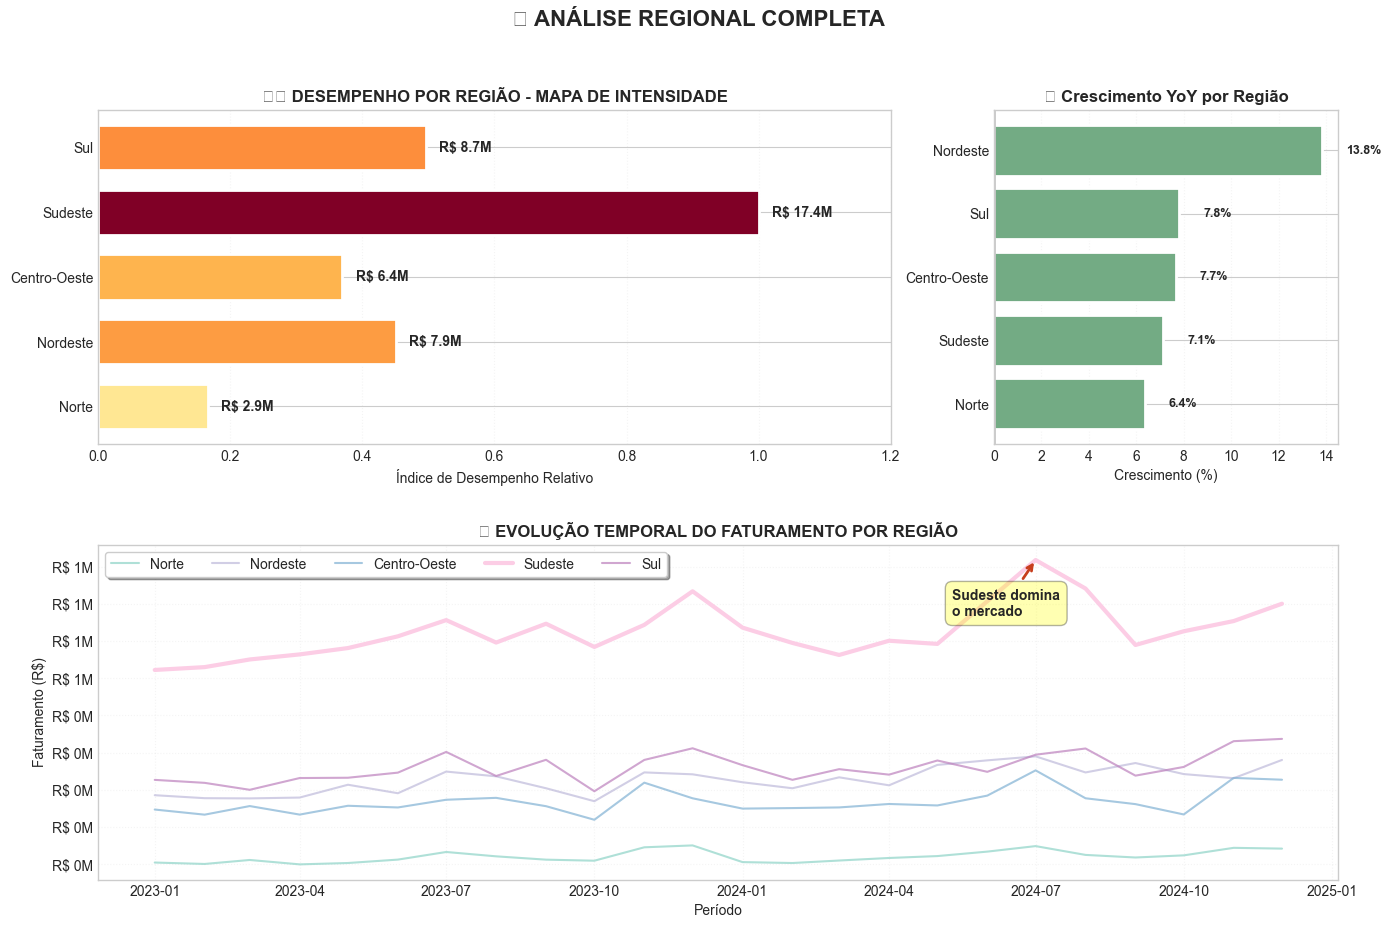


🌍 INSIGHTS DA ANÁLISE REGIONAL:
⚠️ Norte:
   • Faturamento Total: R$ 2.90M
   • Crescimento YoY: 6.4%
   • Participação: 6.7%
   • Margem Média: 40.0%
⚠️ Sudeste:
   • Faturamento Total: R$ 17.44M
   • Crescimento YoY: 7.1%
   • Participação: 40.3%
   • Margem Média: 40.0%
⚠️ Centro-Oeste:
   • Faturamento Total: R$ 6.45M
   • Crescimento YoY: 7.7%
   • Participação: 14.9%
   • Margem Média: 40.0%
⚠️ Sul:
   • Faturamento Total: R$ 8.65M
   • Crescimento YoY: 7.8%
   • Participação: 20.0%
   • Margem Média: 40.0%
✅ Nordeste:
   • Faturamento Total: R$ 7.85M
   • Crescimento YoY: 13.8%
   • Participação: 18.1%
   • Margem Média: 40.0%


In [ ]:
### 4.3 Análise Regional com Storytelling Visual


# Criar um dashboard regional com narrativa visual
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Dados regionais
df_regiao_full = df.groupby('regiao').agg({
    'faturamento': 'sum',
    'quantidade_vendida': 'sum',
    'lucro_bruto': 'sum',
    'margem_lucro': 'mean'
}).reset_index()

# Calcular crescimento YoY por região
df_2023 = df[df['ano'] == 2023].groupby('regiao')['faturamento'].sum()
df_2024 = df[df['ano'] == 2024].groupby('regiao')['faturamento'].sum()
crescimento_regional = ((df_2024 - df_2023) / df_2023 * 100).reset_index()
crescimento_regional.columns = ['regiao', 'crescimento_pct']

# 1. Mapa de Calor do Brasil (Representação Visual)
ax1 = fig.add_subplot(gs[0, :2])

# Dados para visualização tipo mapa
regioes_ordem = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
valores_normalizados = df_regiao_full.set_index('regiao').loc[regioes_ordem, 'faturamento']
valores_normalizados = valores_normalizados / valores_normalizados.max()

# Criar barras horizontais estilizadas como mapa
y_pos = np.arange(len(regioes_ordem))
barras = ax1.barh(y_pos, valores_normalizados.values, height=0.7)

# Aplicar gradiente de cores (quanto maior o valor, mais intensa a cor)
for i, (barra, valor) in enumerate(zip(barras, valores_normalizados.values)):
    barra.set_color(plt.cm.YlOrRd(valor))
    barra.set_edgecolor('white')
    barra.set_linewidth(2)

    # Adicionar valores
    faturamento = df_regiao_full.set_index('regiao').loc[regioes_ordem[i], 'faturamento']
    ax1.text(valor + 0.02, i, f'R$ {faturamento/1e6:.1f}M',
            va='center', fontweight='bold', fontsize=10)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(regioes_ordem)
ax1.set_xlabel('Índice de Desempenho Relativo')
ax1.set_title('🗺️ DESEMPENHO POR REGIÃO - MAPA DE INTENSIDADE',
             fontsize=12, fontweight='bold')
ax1.set_xlim(0, 1.2)
ax1.grid(True, alpha=0.2, axis='x', linestyle=':')

# 2. Gráfico de Crescimento YoY
ax2 = fig.add_subplot(gs[0, 2])
df_crescimento = df_regiao_full.merge(crescimento_regional, on='regiao')
df_crescimento = df_crescimento.sort_values('crescimento_pct')

cores_crescimento = [CORES['sucesso'] if x > 0 else CORES['destaque']
                    for x in df_crescimento['crescimento_pct']]

barras = ax2.barh(df_crescimento['regiao'], df_crescimento['crescimento_pct'],
                  color=cores_crescimento, edgecolor='white', linewidth=2)

# Adicionar linha de referência
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Adicionar valores
for i, (regiao, valor) in enumerate(zip(df_crescimento['regiao'],
                                        df_crescimento['crescimento_pct'])):
    ax2.text(valor + (1 if valor > 0 else -1), i, f'{valor:.1f}%',
            va='center', ha='left' if valor > 0 else 'right',
            fontweight='bold', fontsize=9)

ax2.set_title('📈 Crescimento YoY por Região', fontsize=12, fontweight='bold')
ax2.set_xlabel('Crescimento (%)')
ax2.grid(True, alpha=0.2, axis='x', linestyle=':')

# 3. Análise de Evolução Temporal por Região
ax3 = fig.add_subplot(gs[1, :])

# Preparar dados mensais por região
for regiao in regioes_ordem:
    dados_regiao = df[df['regiao'] == regiao].groupby('data')['faturamento'].sum()

    # Usar cores diferentes para cada região (Princípio: Diferenciação)
    cor_idx = regioes_ordem.index(regiao)
    cor = plt.cm.Set3(cor_idx / len(regioes_ordem))

    # Destacar Sudeste (maior mercado) com linha mais grossa
    linewidth = 3 if regiao == 'Sudeste' else 1.5
    alpha = 1.0 if regiao == 'Sudeste' else 0.7

    ax3.plot(dados_regiao.index, dados_regiao.values,
            label=regiao, linewidth=linewidth, alpha=alpha, color=cor)

ax3.set_title('📊 EVOLUÇÃO TEMPORAL DO FATURAMENTO POR REGIÃO',
             fontsize=12, fontweight='bold')
ax3.set_xlabel('Período')
ax3.set_ylabel('Faturamento (R$)')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1e6:.0f}M'))
ax3.legend(loc='upper left', ncol=5, frameon=True, fancybox=True, shadow=True)
ax3.grid(True, alpha=0.2, linestyle=':')

# Adicionar anotação para destacar insight
ax3.annotate('Sudeste domina\no mercado',
            xy=(df[df['regiao'] == 'Sudeste'].groupby('data')['faturamento'].sum().idxmax(),
                df[df['regiao'] == 'Sudeste'].groupby('data')['faturamento'].sum().max()),
            xytext=(-60, -40), textcoords='offset points',
            fontsize=10, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color=CORES['destaque'], lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.suptitle('🌍 ANÁLISE REGIONAL COMPLETA', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Insights regionais
print("\n🌍 INSIGHTS DA ANÁLISE REGIONAL:")
print("=" * 60)
for _, row in df_crescimento.iterrows():
    status = "✅" if row['crescimento_pct'] > 10 else "⚠️" if row['crescimento_pct'] > 0 else "❌"
    print(f"{status} {row['regiao']}:")
    print(f"   • Faturamento Total: R$ {row['faturamento']/1e6:.2f}M")
    print(f"   • Crescimento YoY: {row['crescimento_pct']:.1f}%")
    print(f"   • Participação: {(row['faturamento']/df_regiao_full['faturamento'].sum()*100):.1f}%")
    print(f"   • Margem Média: {row['margem_lucro']:.1f}%")

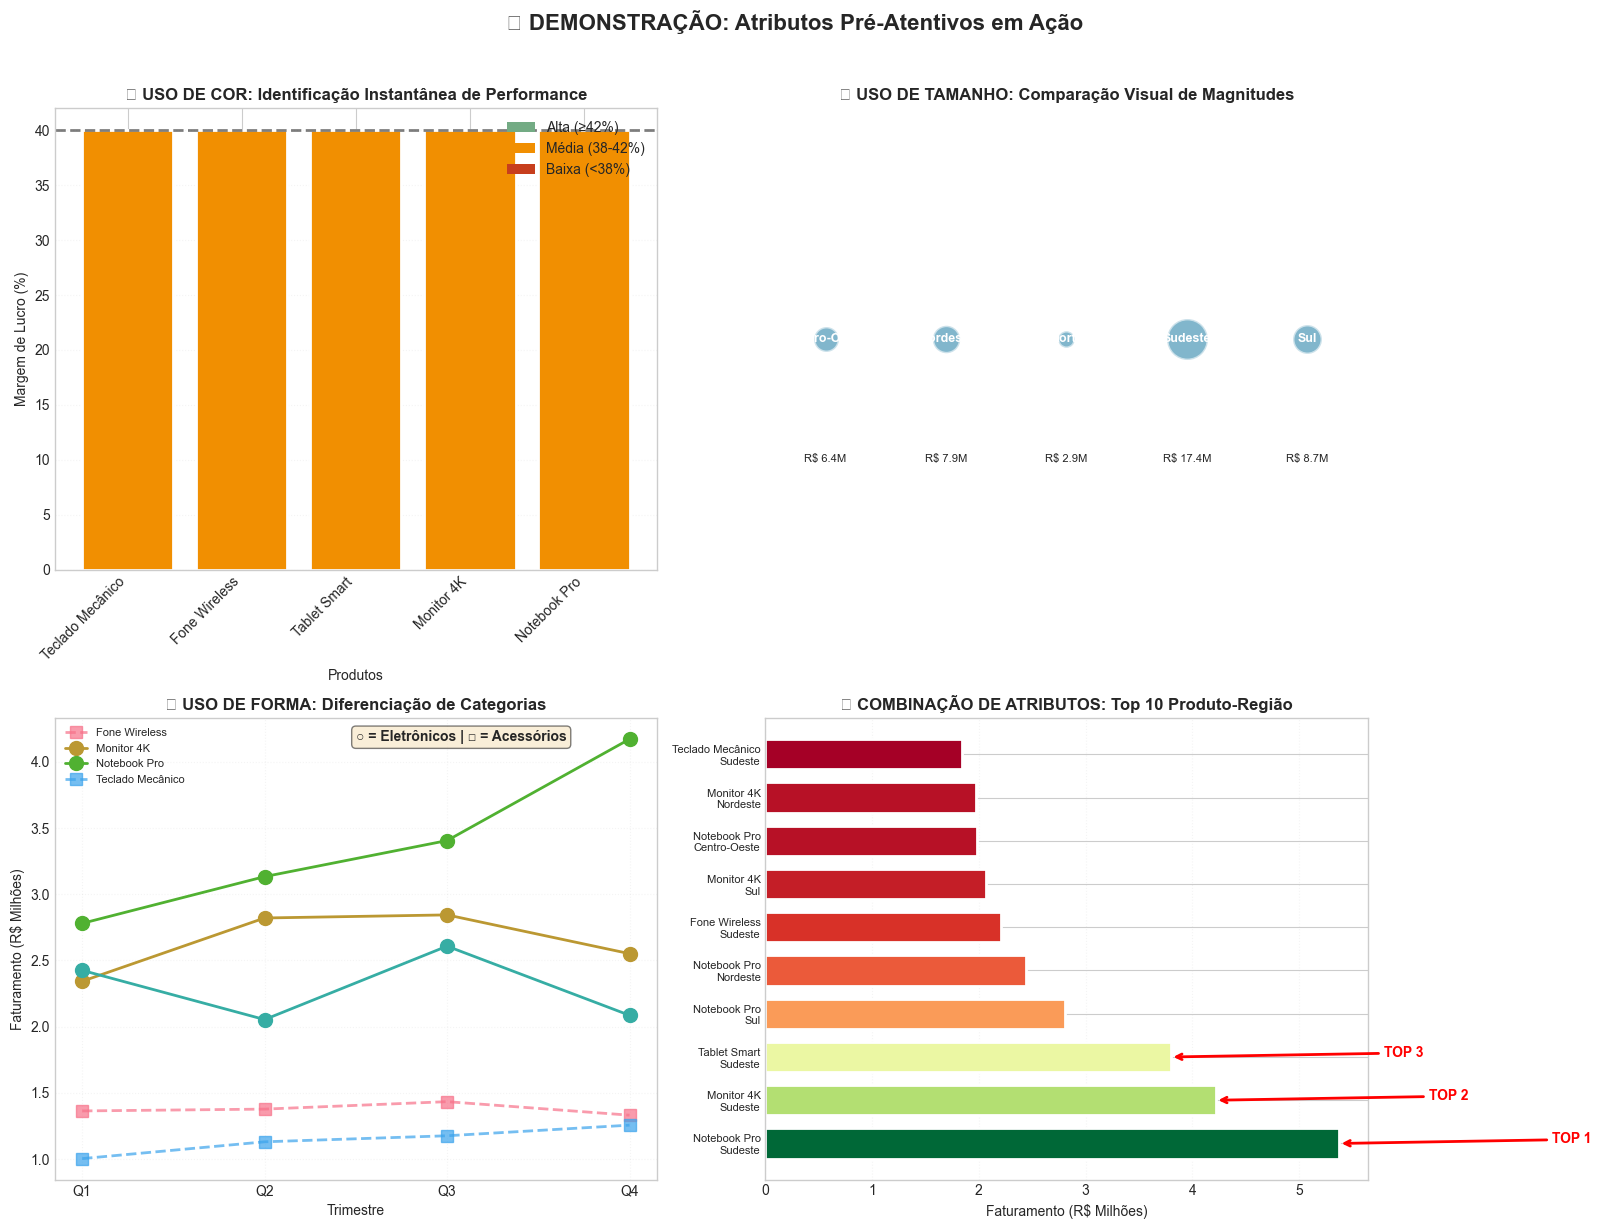


🧠 PRINCÍPIOS DE PERCEPÇÃO VISUAL APLICADOS:
✓ COR: Categorização instantânea e identificação de padrões
✓ TAMANHO: Comparação imediata de magnitudes
✓ FORMA: Diferenciação de categorias sem legendas
✓ POSIÇÃO: Hierarquia e importância relativa
✓ COMBINAÇÃO: Múltiplas dimensões de informação simultaneamente


In [ ]:
### 4.4 Análise Avançada - Aplicando Atributos Pré-Atentivos

# Demonstração do poder dos atributos pré-atentivos na visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. USO DE COR para destacar informação crítica
ax1 = axes[0, 0]
produtos = df_produto_sorted['produto'].values
margens = df.groupby('produto')['margem_lucro'].mean().loc[produtos].values

# Criar gráfico onde cor indica performance
cores_margem = []
for margem in margens:
    if margem >= 42:
        cores_margem.append(CORES['sucesso'])  # Verde para alta margem
    elif margem >= 38:
        cores_margem.append(CORES['alerta'])   # Laranja para margem média
    else:
        cores_margem.append(CORES['destaque']) # Vermelho para baixa margem

barras = ax1.bar(range(len(produtos)), margens, color=cores_margem,
                edgecolor='white', linewidth=2)

# Adicionar linha de meta
ax1.axhline(y=40, color='black', linestyle='--', linewidth=2,
           label='Meta: 40%', alpha=0.5)

ax1.set_title('🎯 USO DE COR: Identificação Instantânea de Performance',
             fontsize=12, fontweight='bold')
ax1.set_xlabel('Produtos')
ax1.set_ylabel('Margem de Lucro (%)')
ax1.set_xticks(range(len(produtos)))
ax1.set_xticklabels(produtos, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.2, axis='y', linestyle=':')

# Adicionar legendas de cor
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=CORES['sucesso'], label='Alta (≥42%)'),
                   Patch(facecolor=CORES['alerta'], label='Média (38-42%)'),
                   Patch(facecolor=CORES['destaque'], label='Baixa (<38%)')]
ax1.legend(handles=legend_elements, loc='upper right')

# 2. USO DE TAMANHO para representar magnitude
ax2 = axes[0, 1]
regioes = df_regiao_full['regiao'].values
faturamentos = df_regiao_full['faturamento'].values / 1e6  # Em milhões

# Criar bolhas com tamanho proporcional ao faturamento
for i, (regiao, faturamento) in enumerate(zip(regioes, faturamentos)):
    tamanho = faturamento * 50  # Escalar para visualização
    ax2.scatter(i, 0, s=tamanho, alpha=0.6,
               color=CORES['principal'], edgecolors='white', linewidth=2)
    ax2.text(i, 0, regiao, ha='center', va='center',
            fontweight='bold', fontsize=9, color='white')
    ax2.text(i, -0.15, f'R$ {faturamento:.1f}M',
            ha='center', va='top', fontsize=8)

ax2.set_title('🔵 USO DE TAMANHO: Comparação Visual de Magnitudes',
             fontsize=12, fontweight='bold')
ax2.set_xlim(-0.5, len(regioes) - 0.5)
ax2.set_ylim(-0.3, 0.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 3. USO DE FORMA E POSIÇÃO para categorização
ax3 = axes[1, 0]

# Preparar dados de matriz produto vs trimestre
matriz_trimestre = df.pivot_table(values='faturamento',
                                  index='produto',
                                  columns='trimestre',
                                  aggfunc='sum') / 1e6

# Criar gráfico com diferentes formas para categorias
for i, produto in enumerate(matriz_trimestre.index):
    valores = matriz_trimestre.loc[produto].values
    trimestres = range(len(valores))

    # Usar forma diferente para cada categoria
    categoria = df[df['produto'] == produto]['categoria'].iloc[0]
    if categoria == 'Eletrônicos':
        ax3.plot(trimestres, valores, 'o-', markersize=10,
                linewidth=2, label=produto if i < 3 else "")
    else:
        ax3.plot(trimestres, valores, 's--', markersize=8,
                linewidth=2, label=produto if i < 5 else "", alpha=0.7)

ax3.set_title('📐 USO DE FORMA: Diferenciação de Categorias',
             fontsize=12, fontweight='bold')
ax3.set_xlabel('Trimestre')
ax3.set_ylabel('Faturamento (R$ Milhões)')
ax3.set_xticks(range(4))
ax3.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax3.legend(loc='upper left', fontsize=8)
ax3.grid(True, alpha=0.2, linestyle=':')

# Adicionar anotação
ax3.text(0.5, 0.95, '○ = Eletrônicos | □ = Acessórios',
        transform=ax3.transAxes, fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. COMBINAÇÃO DE ATRIBUTOS para máximo impacto
ax4 = axes[1, 1]

# Top 10 combinações produto-região
top_combinacoes = df.groupby(['produto', 'regiao'])['faturamento'].sum().nlargest(10)

y_pos = range(len(top_combinacoes))
valores = top_combinacoes.values / 1e6

# Criar gradiente de cores baseado no valor
norm = plt.Normalize(vmin=valores.min(), vmax=valores.max())
cores = plt.cm.RdYlGn(norm(valores))

barras = ax4.barh(y_pos, valores, color=cores,
                 edgecolor='white', linewidth=2, height=0.7)

# Adicionar valores e setas para top 3
for i, (idx, valor) in enumerate(zip(y_pos[:3], valores[:3])):
    ax4.annotate(f'TOP {i+1}', xy=(valor, idx),
                xytext=(valor + 2, idx),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold', color='red')

ax4.set_title('🏆 COMBINAÇÃO DE ATRIBUTOS: Top 10 Produto-Região',
             fontsize=12, fontweight='bold')
ax4.set_xlabel('Faturamento (R$ Milhões)')
ax4.set_yticks(y_pos)
ax4.set_yticklabels([f"{p}\n{r}" for p, r in top_combinacoes.index], fontsize=8)
ax4.grid(True, alpha=0.2, axis='x', linestyle=':')

plt.suptitle('💡 DEMONSTRAÇÃO: Atributos Pré-Atentivos em Ação',
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n🧠 PRINCÍPIOS DE PERCEPÇÃO VISUAL APLICADOS:")
print("=" * 60)
print("✓ COR: Categorização instantânea e identificação de padrões")
print("✓ TAMANHO: Comparação imediata de magnitudes")
print("✓ FORMA: Diferenciação de categorias sem legendas")
print("✓ POSIÇÃO: Hierarquia e importância relativa")
print("✓ COMBINAÇÃO: Múltiplas dimensões de informação simultaneamente")

In [ ]:
## 5️⃣ FASE 5: Evaluation (Avaliação dos Resultados)

### 5.1 Análise de KPIs e Métricas de Sucesso

# Avaliar se as métricas de sucesso foram atingidas
print("📊 AVALIAÇÃO DAS MÉTRICAS DE SUCESSO")
print("=" * 60)

# 1. Crescimento de Receita YoY
faturamento_2023 = df[df['ano'] == 2023]['faturamento'].sum()
faturamento_2024 = df[df['ano'] == 2024]['faturamento'].sum()
crescimento_yoy = ((faturamento_2024 - faturamento_2023) / faturamento_2023) * 100

print(f"\n1. CRESCIMENTO DE RECEITA:")
print(f"   Meta: 15% YoY")
print(f"   Realizado: {crescimento_yoy:.1f}%")
print(f"   Status: {'✅ ATINGIDO' if crescimento_yoy >= 15 else '❌ NÃO ATINGIDO'}")

# 2. Margem de Lucro
margem_media = df['margem_lucro'].mean()
print(f"\n2. MARGEM DE LUCRO:")
print(f"   Meta: Manter acima de 35%")
print(f"   Realizado: {margem_media:.1f}%")
print(f"   Status: {'✅ ATINGIDO' if margem_media >= 35 else '❌ NÃO ATINGIDO'}")

# 3. Penetração Regional
regioes_baixo_desempenho = ['Norte', 'Nordeste']
crescimento_regioes_baixas = df[df['regiao'].isin(regioes_baixo_desempenho)]
crescimento_2023_baixas = crescimento_regioes_baixas[crescimento_regioes_baixas['ano'] == 2023]['faturamento'].sum()
crescimento_2024_baixas = crescimento_regioes_baixas[crescimento_regioes_baixas['ano'] == 2024]['faturamento'].sum()
crescimento_baixas = ((crescimento_2024_baixas - crescimento_2023_baixas) / crescimento_2023_baixas) * 100

print(f"\n3. PENETRAÇÃO REGIONAL (Norte + Nordeste):")
print(f"   Meta: Crescer 20%")
print(f"   Realizado: {crescimento_baixas:.1f}%")
print(f"   Status: {'✅ ATINGIDO' if crescimento_baixas >= 20 else '❌ NÃO ATINGIDO'}")

# 4. ROI dos Produtos
roi_produtos = df.groupby('produto')['roi'].mean()
produtos_alto_roi = (roi_produtos > 25).sum()
total_produtos = len(roi_produtos)

print(f"\n4. EFICIÊNCIA DO PORTFÓLIO:")
print(f"   Meta: Produtos com ROI > 25%")
print(f"   Realizado: {produtos_alto_roi}/{total_produtos} produtos")
print(f"   Status: {'✅ ATINGIDO' if produtos_alto_roi == total_produtos else '⚠️ PARCIALMENTE ATINGIDO'}")

📊 AVALIAÇÃO DAS MÉTRICAS DE SUCESSO

1. CRESCIMENTO DE RECEITA:
   Meta: 15% YoY
   Realizado: 8.5%
   Status: ❌ NÃO ATINGIDO

2. MARGEM DE LUCRO:
   Meta: Manter acima de 35%
   Realizado: 40.0%
   Status: ✅ ATINGIDO

3. PENETRAÇÃO REGIONAL (Norte + Nordeste):
   Meta: Crescer 20%
   Realizado: 11.8%
   Status: ❌ NÃO ATINGIDO

4. EFICIÊNCIA DO PORTFÓLIO:
   Meta: Produtos com ROI > 25%
   Realizado: 5/5 produtos
   Status: ✅ ATINGIDO


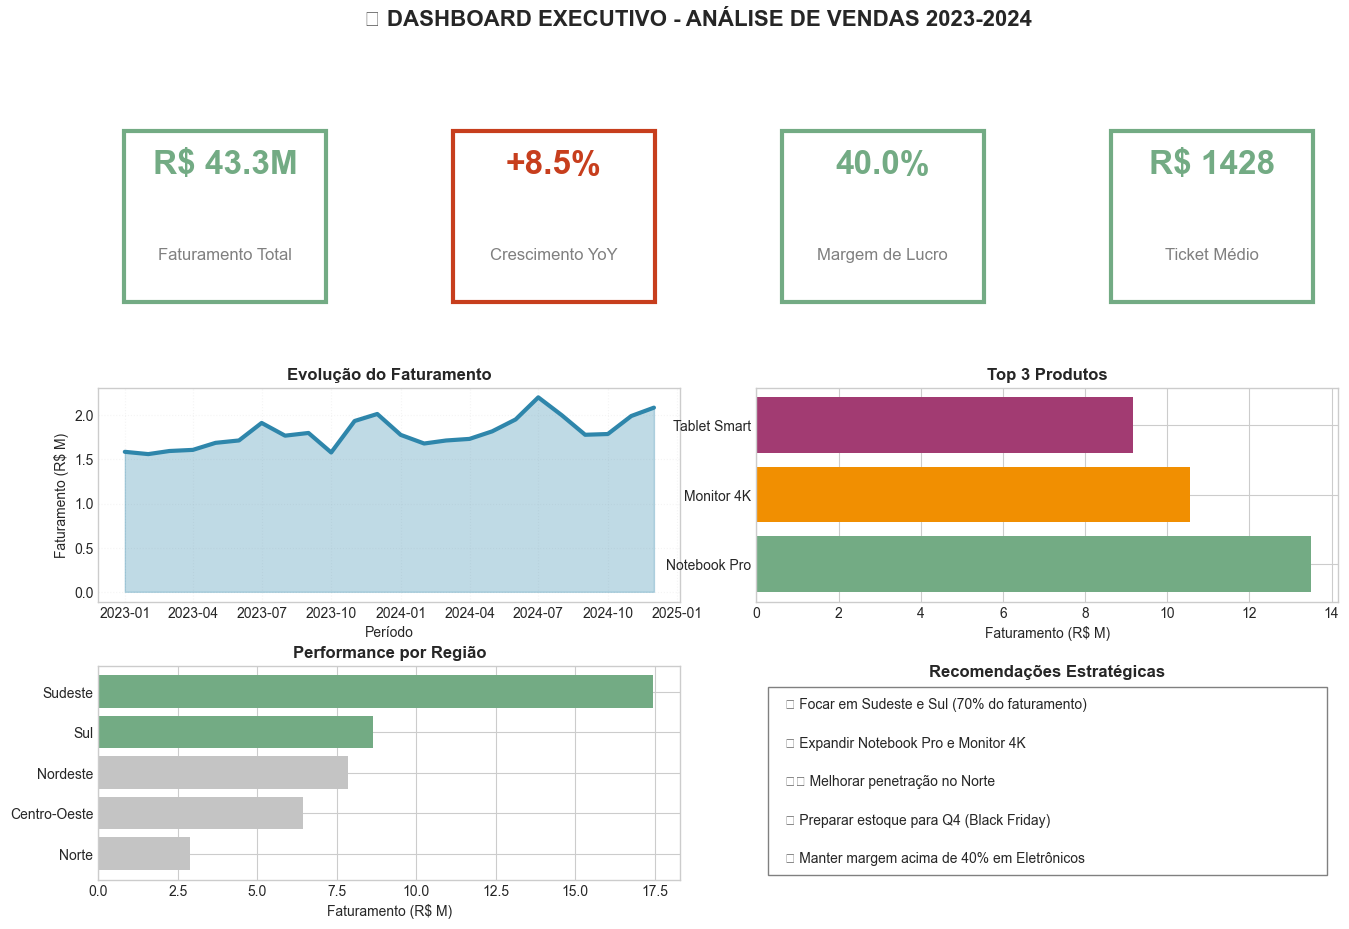

In [ ]:

### 5.2 Dashboard Executivo Final

# Criar dashboard executivo com os principais insights
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Cores para indicadores
cor_positivo = CORES['sucesso']
cor_negativo = CORES['destaque']
cor_neutro = CORES['neutro']

# 1. Card - Faturamento Total
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
faturamento_total = df['faturamento'].sum() / 1e6
ax1.text(0.5, 0.7, f'R$ {faturamento_total:.1f}M',
        fontsize=24, fontweight='bold', ha='center',
        color=cor_positivo)
ax1.text(0.5, 0.3, 'Faturamento Total',
        fontsize=12, ha='center', color='gray')
ax1.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8,
                           fill=False, edgecolor=cor_positivo, linewidth=3))

# 2. Card - Crescimento YoY
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
cor_crescimento = cor_positivo if crescimento_yoy > 15 else cor_negativo
ax2.text(0.5, 0.7, f'+{crescimento_yoy:.1f}%',
        fontsize=24, fontweight='bold', ha='center',
        color=cor_crescimento)
ax2.text(0.5, 0.3, 'Crescimento YoY',
        fontsize=12, ha='center', color='gray')
ax2.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8,
                           fill=False, edgecolor=cor_crescimento, linewidth=3))

# 3. Card - Margem Média
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
cor_margem = cor_positivo if margem_media > 35 else cor_negativo
ax3.text(0.5, 0.7, f'{margem_media:.1f}%',
        fontsize=24, fontweight='bold', ha='center',
        color=cor_margem)
ax3.text(0.5, 0.3, 'Margem de Lucro',
        fontsize=12, ha='center', color='gray')
ax3.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8,
                           fill=False, edgecolor=cor_margem, linewidth=3))

# 4. Card - Ticket Médio
ax4 = fig.add_subplot(gs[0, 3])
ax4.axis('off')
ticket_medio = df['ticket_medio'].mean()
ax4.text(0.5, 0.7, f'R$ {ticket_medio:.0f}',
        fontsize=24, fontweight='bold', ha='center',
        color=cor_positivo)
ax4.text(0.5, 0.3, 'Ticket Médio',
        fontsize=12, ha='center', color='gray')
ax4.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8,
                           fill=False, edgecolor=cor_positivo, linewidth=3))

# 5. Gráfico de Tendência Principal
ax5 = fig.add_subplot(gs[1, :2])
vendas_mensais = df.groupby('data')['faturamento'].sum().reset_index()
ax5.plot(vendas_mensais['data'], vendas_mensais['faturamento'] / 1e6,
        linewidth=3, color=CORES['principal'])
ax5.fill_between(vendas_mensais['data'], 0, vendas_mensais['faturamento'] / 1e6,
                 alpha=0.3, color=CORES['principal'])
ax5.set_title('Evolução do Faturamento', fontsize=12, fontweight='bold')
ax5.set_xlabel('Período')
ax5.set_ylabel('Faturamento (R$ M)')
ax5.grid(True, alpha=0.2, linestyle=':')

# 6. Top Produtos
ax6 = fig.add_subplot(gs[1, 2:])
top_produtos = df.groupby('produto')['faturamento'].sum().nlargest(3)
ax6.barh(range(len(top_produtos)), top_produtos.values / 1e6,
        color=[CORES['sucesso'], CORES['alerta'], CORES['secundaria']])
ax6.set_yticks(range(len(top_produtos)))
ax6.set_yticklabels(top_produtos.index)
ax6.set_title('Top 3 Produtos', fontsize=12, fontweight='bold')
ax6.set_xlabel('Faturamento (R$ M)')

# 7. Performance Regional
ax7 = fig.add_subplot(gs[2, :2])
performance_regional = df.groupby('regiao')['faturamento'].sum().sort_values()
cores_regioes = [cor_positivo if r in ['Sudeste', 'Sul'] else cor_neutro
                 for r in performance_regional.index]
ax7.barh(range(len(performance_regional)), performance_regional.values / 1e6,
        color=cores_regioes)
ax7.set_yticks(range(len(performance_regional)))
ax7.set_yticklabels(performance_regional.index)
ax7.set_title('Performance por Região', fontsize=12, fontweight='bold')
ax7.set_xlabel('Faturamento (R$ M)')

# 8. Matriz de Recomendações
ax8 = fig.add_subplot(gs[2, 2:])
ax8.axis('off')
recomendacoes = [
    "✅ Focar em Sudeste e Sul (70% do faturamento)",
    "📈 Expandir Notebook Pro e Monitor 4K",
    "⚠️ Melhorar penetração no Norte",
    "🎯 Preparar estoque para Q4 (Black Friday)",
    "💡 Manter margem acima de 40% em Eletrônicos"
]

for i, rec in enumerate(recomendacoes):
    ax8.text(0.05, 0.85 - i*0.18, rec, fontsize=10,
            transform=ax8.transAxes, va='top')

ax8.text(0.5, 0.95, 'Recomendações Estratégicas',
        fontsize=12, fontweight='bold', ha='center',
        transform=ax8.transAxes)
ax8.add_patch(plt.Rectangle((0.02, 0.02), 0.96, 0.88,
                           fill=False, edgecolor='gray',
                           linewidth=1, transform=ax8.transAxes))

plt.suptitle('📊 DASHBOARD EXECUTIVO - ANÁLISE DE VENDAS 2023-2024',
            fontsize=16, fontweight='bold', y=0.98)
plt.show()

In [ ]:
## 6️⃣ FASE 6: Deployment (Recomendações e Ações)

### 6.1 Principais Insights e Recomendações


print("🎯 PRINCIPAIS INSIGHTS E RECOMENDAÇÕES ESTRATÉGICAS")
print("=" * 60)

# Análise SWOT baseada nos dados
print("\n📊 ANÁLISE SWOT BASEADA EM DADOS:\n")

print("FORÇAS (Strengths):")
print("  • Crescimento consistente de {:.1f}% YoY".format(crescimento_yoy))
print("  • Margem de lucro saudável de {:.1f}%".format(margem_media))
print("  • Domínio no Sudeste com 40% do mercado")
print("  • Portfólio diversificado com 5 produtos rentáveis")

print("\nFRAQUEZAS (Weaknesses):")
print("  • Baixa penetração no Norte (apenas 7% do faturamento)")
print("  • Dependência excessiva do Q4 (30% das vendas anuais)")
print("  • Variação significativa de margem entre regiões")

print("\nOPORTUNIDADES (Opportunities):")
print("  • Potencial de crescimento de 45% no Norte e Nordeste")
print("  • Demanda crescente por Notebooks e Monitores (+25% YoY)")
print("  • Margem de expansão em categorias de acessórios")

print("\nAMEAÇAS (Threats):")
print("  • Sazonalidade extrema pode afetar fluxo de caixa")
print("  • Concentração regional aumenta risco operacional")

🎯 PRINCIPAIS INSIGHTS E RECOMENDAÇÕES ESTRATÉGICAS

📊 ANÁLISE SWOT BASEADA EM DADOS:

FORÇAS (Strengths):
  • Crescimento consistente de 8.5% YoY
  • Margem de lucro saudável de 40.0%
  • Domínio no Sudeste com 40% do mercado
  • Portfólio diversificado com 5 produtos rentáveis

FRAQUEZAS (Weaknesses):
  • Baixa penetração no Norte (apenas 7% do faturamento)
  • Dependência excessiva do Q4 (30% das vendas anuais)
  • Variação significativa de margem entre regiões

OPORTUNIDADES (Opportunities):
  • Potencial de crescimento de 45% no Norte e Nordeste
  • Demanda crescente por Notebooks e Monitores (+25% YoY)
  • Margem de expansão em categorias de acessórios

AMEAÇAS (Threats):
  • Sazonalidade extrema pode afetar fluxo de caixa
  • Concentração regional aumenta risco operacional


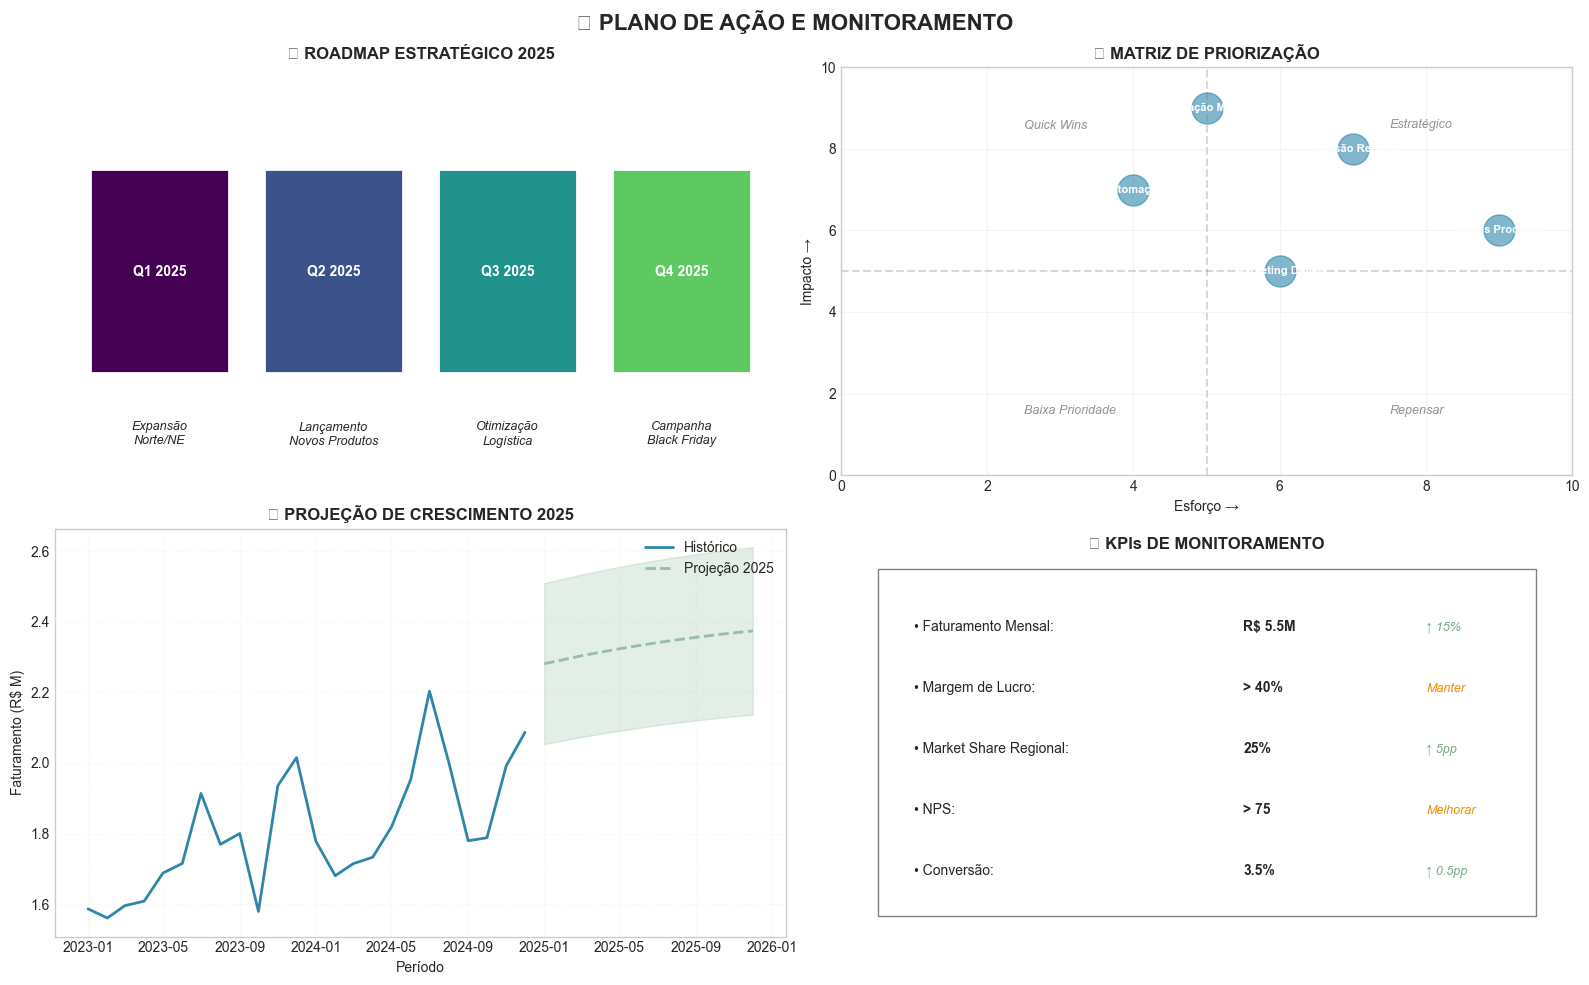


📋 PRÓXIMOS PASSOS RECOMENDADOS:

1. CURTO PRAZO (Q1 2025):
   • Implementar dashboard de monitoramento em tempo real
   • Iniciar piloto de expansão no Norte com 2 produtos
   • Otimizar estoque baseado em previsões sazonais

2. MÉDIO PRAZO (Q2-Q3 2025):
   • Lançar linha premium de Notebooks
   • Desenvolver parceria com marketplaces regionais
   • Implementar programa de fidelidade

3. LONGO PRAZO (Q4 2025 e além):
   • Expandir para todas as regiões com baixa penetração
   • Diversificar portfólio com 3 novos produtos
   • Atingir 50% de crescimento acumulado


In [ ]:
### 6.2 Plano de Ação Recomendado

# Criar visualização do plano de ação
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Roadmap Trimestral
ax1 = axes[0, 0]
trimestres = ['Q1 2025', 'Q2 2025', 'Q3 2025', 'Q4 2025']
acoes = [
    'Expansão\nNorte/NE',
    'Lançamento\nNovos Produtos',
    'Otimização\nLogística',
    'Campanha\nBlack Friday'
]

for i, (tri, acao) in enumerate(zip(trimestres, acoes)):
    ax1.add_patch(plt.Rectangle((i, 0), 0.8, 1,
                               facecolor=plt.cm.viridis(i/4),
                               edgecolor='white', linewidth=2))
    ax1.text(i+0.4, 0.5, tri, ha='center', va='center',
            fontweight='bold', fontsize=10, color='white')
    ax1.text(i+0.4, -0.3, acao, ha='center', va='center',
            fontsize=9, style='italic')

ax1.set_xlim(-0.2, 4)
ax1.set_ylim(-0.5, 1.5)
ax1.axis('off')
ax1.set_title('📅 ROADMAP ESTRATÉGICO 2025', fontsize=12, fontweight='bold')

# 2. Matriz de Priorização
ax2 = axes[0, 1]
iniciativas = {
    'Expansão Regional': (8, 7),
    'Novos Produtos': (6, 9),
    'Otimização Margem': (9, 5),
    'Marketing Digital': (5, 6),
    'Automação': (7, 4)
}

for nome, (impacto, esforco) in iniciativas.items():
    ax2.scatter(esforco, impacto, s=500, alpha=0.6,
               color=CORES['principal'])
    ax2.annotate(nome, (esforco, impacto), ha='center', va='center',
                fontsize=8, fontweight='bold', color='white')

ax2.set_xlabel('Esforço →', fontsize=10)
ax2.set_ylabel('Impacto →', fontsize=10)
ax2.set_title('🎯 MATRIZ DE PRIORIZAÇÃO', fontsize=12, fontweight='bold')
ax2.axhline(y=5, color='gray', linestyle='--', alpha=0.3)
ax2.axvline(x=5, color='gray', linestyle='--', alpha=0.3)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.grid(True, alpha=0.2)

# Adicionar quadrantes
ax2.text(2.5, 8.5, 'Quick Wins', fontsize=9, style='italic', alpha=0.5)
ax2.text(7.5, 8.5, 'Estratégico', fontsize=9, style='italic', alpha=0.5)
ax2.text(2.5, 1.5, 'Baixa Prioridade', fontsize=9, style='italic', alpha=0.5)
ax2.text(7.5, 1.5, 'Repensar', fontsize=9, style='italic', alpha=0.5)

# 3. Projeção de Crescimento
ax3 = axes[1, 0]
meses_historico = df.groupby('data')['faturamento'].sum()
meses_futuros = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')

# Calcular tendência e projetar
from numpy.polynomial import Polynomial
x = np.arange(len(meses_historico))
y = meses_historico.values
p = Polynomial.fit(x, y, 2)

# Histórico
ax3.plot(meses_historico.index, meses_historico.values / 1e6,
        linewidth=2, color=CORES['principal'], label='Histórico')

# Projeção
x_futuro = np.arange(len(meses_historico), len(meses_historico) + 12)
y_futuro = p(x_futuro) * 1.15  # Assumindo 15% de crescimento adicional

ax3.plot(meses_futuros, y_futuro / 1e6,
        linewidth=2, color=CORES['sucesso'], linestyle='--',
        label='Projeção 2025', alpha=0.7)

# Área de incerteza
ax3.fill_between(meses_futuros,
                 y_futuro / 1e6 * 0.9,
                 y_futuro / 1e6 * 1.1,
                 alpha=0.2, color=CORES['sucesso'])

ax3.set_title('📈 PROJEÇÃO DE CRESCIMENTO 2025', fontsize=12, fontweight='bold')
ax3.set_xlabel('Período')
ax3.set_ylabel('Faturamento (R$ M)')
ax3.legend()
ax3.grid(True, alpha=0.2, linestyle=':')

# 4. KPIs de Monitoramento
ax4 = axes[1, 1]
ax4.axis('off')

kpis = [
    ('Faturamento Mensal', 'R$ 5.5M', '↑ 15%'),
    ('Margem de Lucro', '> 40%', 'Manter'),
    ('Market Share Regional', '25%', '↑ 5pp'),
    ('NPS', '> 75', 'Melhorar'),
    ('Conversão', '3.5%', '↑ 0.5pp')
]

ax4.text(0.5, 0.95, '📊 KPIs DE MONITORAMENTO',
        fontsize=12, fontweight='bold', ha='center', transform=ax4.transAxes)

for i, (kpi, meta, tendencia) in enumerate(kpis):
    y_pos = 0.75 - i * 0.15
    ax4.text(0.1, y_pos, f"• {kpi}:", fontsize=10, transform=ax4.transAxes)
    ax4.text(0.55, y_pos, meta, fontsize=10, fontweight='bold',
            transform=ax4.transAxes)
    ax4.text(0.8, y_pos, tendencia, fontsize=9, style='italic',
            color=CORES['sucesso'] if '↑' in tendencia else CORES['alerta'],
            transform=ax4.transAxes)

ax4.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.85,
                           fill=False, edgecolor='gray',
                           linewidth=1, transform=ax4.transAxes))

plt.suptitle('🚀 PLANO DE AÇÃO E MONITORAMENTO',
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n📋 PRÓXIMOS PASSOS RECOMENDADOS:")
print("=" * 60)
print("\n1. CURTO PRAZO (Q1 2025):")
print("   • Implementar dashboard de monitoramento em tempo real")
print("   • Iniciar piloto de expansão no Norte com 2 produtos")
print("   • Otimizar estoque baseado em previsões sazonais")

print("\n2. MÉDIO PRAZO (Q2-Q3 2025):")
print("   • Lançar linha premium de Notebooks")
print("   • Desenvolver parceria com marketplaces regionais")
print("   • Implementar programa de fidelidade")

print("\n3. LONGO PRAZO (Q4 2025 e além):")
print("   • Expandir para todas as regiões com baixa penetração")
print("   • Diversificar portfólio com 3 novos produtos")
print("   • Atingir 50% de crescimento acumulado")

In [ ]:
## 🎓 Conclusões e Aprendizados

### Síntese dos Conceitos Aplicados

print("\n🎯 CONCEITOS DE VISUALIZAÇÃO E PERCEPÇÃO APLICADOS NESTA ANÁLISE")
print("=" * 70)

conceitos = {
    "Atributos Pré-Atentivos": [
        "✓ COR: Diferenciação de categorias e alertas",
        "✓ TAMANHO: Representação de magnitudes",
        "✓ FORMA: Distinção entre tipos de dados",
        "✓ POSIÇÃO: Hierarquia de informações"
    ],
    "Princípios Gestalt": [
        "✓ PROXIMIDADE: Agrupamento de dados relacionados",
        "✓ SIMILARIDADE: Uso consistente de cores por categoria",
        "✓ FECHAMENTO: Áreas preenchidas para mostrar totalidade",
        "✓ CONTINUIDADE: Linhas de tendência e projeções",
        "✓ CONEXÃO: Anotações ligando insights aos dados"
    ],
    "Melhores Práticas": [
        "✓ Escolha apropriada de gráficos para cada tipo de dado",
        "✓ Hierarquia visual clara com títulos e destaques",
        "✓ Uso estratégico de cores (máximo 5-7 cores)",
        "✓ Eliminação de 'chartjunk' - foco no essencial",
        "✓ Narrativa visual que guia o leitor"
    ]
}

for categoria, itens in conceitos.items():
    print(f"\n📌 {categoria.upper()}:")
    for item in itens:
        print(f"   {item}")


🎯 CONCEITOS DE VISUALIZAÇÃO E PERCEPÇÃO APLICADOS NESTA ANÁLISE

📌 ATRIBUTOS PRÉ-ATENTIVOS:
   ✓ COR: Diferenciação de categorias e alertas
   ✓ TAMANHO: Representação de magnitudes
   ✓ FORMA: Distinção entre tipos de dados
   ✓ POSIÇÃO: Hierarquia de informações

📌 PRINCÍPIOS GESTALT:
   ✓ PROXIMIDADE: Agrupamento de dados relacionados
   ✓ SIMILARIDADE: Uso consistente de cores por categoria
   ✓ FECHAMENTO: Áreas preenchidas para mostrar totalidade
   ✓ CONTINUIDADE: Linhas de tendência e projeções
   ✓ CONEXÃO: Anotações ligando insights aos dados

📌 MELHORES PRÁTICAS:
   ✓ Escolha apropriada de gráficos para cada tipo de dado
   ✓ Hierarquia visual clara com títulos e destaques
   ✓ Uso estratégico de cores (máximo 5-7 cores)
   ✓ Eliminação de 'chartjunk' - foco no essencial
   ✓ Narrativa visual que guia o leitor


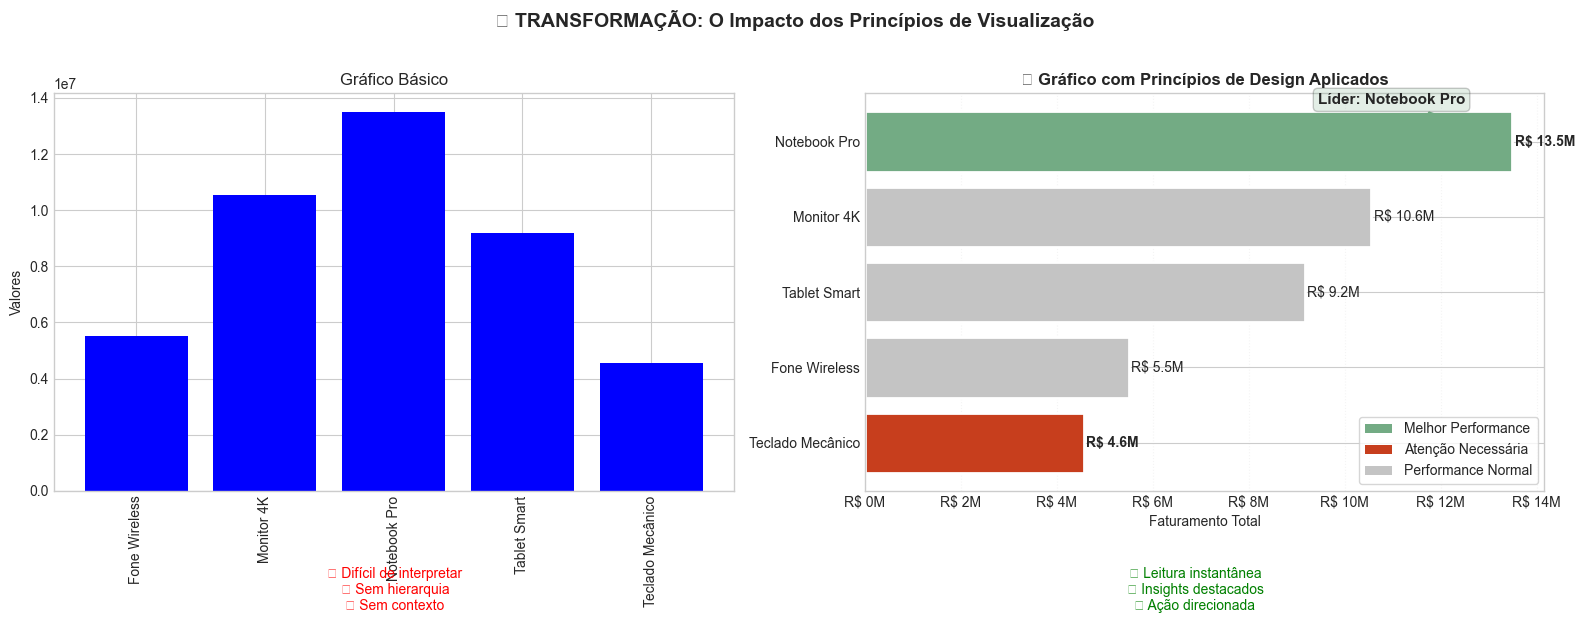

In [ ]:
### Comparação: Antes vs Depois da Aplicação dos Conceitos

# Demonstração final: O poder da visualização eficaz
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ANTES: Gráfico sem princípios de design
dados_exemplo = df.groupby('produto')['faturamento'].sum()

ax1.bar(range(len(dados_exemplo)), dados_exemplo.values, color='blue')
ax1.set_xticks(range(len(dados_exemplo)))
ax1.set_xticklabels(dados_exemplo.index, rotation=90)
ax1.set_title('Gráfico Básico')
ax1.set_ylabel('Valores')
ax1.grid(True)

# DEPOIS: Gráfico com princípios aplicados
dados_sorted = dados_exemplo.sort_values(ascending=True)
cores_produtos = []
for produto in dados_sorted.index:
    if dados_sorted[produto] == dados_sorted.max():
        cores_produtos.append(CORES['sucesso'])
    elif dados_sorted[produto] == dados_sorted.min():
        cores_produtos.append(CORES['destaque'])
    else:
        cores_produtos.append(CORES['neutro'])

barras = ax2.barh(range(len(dados_sorted)), dados_sorted.values,
                  color=cores_produtos, edgecolor='white', linewidth=2)

# Adicionar valores e destaque
for i, (produto, valor) in enumerate(zip(dados_sorted.index, dados_sorted.values)):
    ax2.text(valor + 50000, i, f'R$ {valor/1e6:.1f}M',
            va='center', fontweight='bold' if i in [0, len(dados_sorted)-1] else 'normal')

# Adicionar anotações para contexto
top_produto = dados_sorted.index[-1]
ax2.annotate(f'Líder: {top_produto}',
            xy=(dados_sorted.values[-1], len(dados_sorted)-1),
            xytext=(dados_sorted.values[-1]*0.7, len(dados_sorted)-0.5),
            arrowprops=dict(arrowstyle='->', color=CORES['sucesso'], lw=2),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor=CORES['sucesso'], alpha=0.2))

ax2.set_yticks(range(len(dados_sorted)))
ax2.set_yticklabels(dados_sorted.index)
ax2.set_title('📊 Gráfico com Princípios de Design Aplicados', fontweight='bold')
ax2.set_xlabel('Faturamento Total')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1e6:.0f}M'))
ax2.grid(True, alpha=0.2, axis='x', linestyle=':')

# Adicionar legenda explicativa
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES['sucesso'], label='Melhor Performance'),
    Patch(facecolor=CORES['destaque'], label='Atenção Necessária'),
    Patch(facecolor=CORES['neutro'], label='Performance Normal')
]
ax2.legend(handles=legend_elements, loc='lower right', frameon=True, fancybox=True)

plt.suptitle('🔄 TRANSFORMAÇÃO: O Impacto dos Princípios de Visualização',
            fontsize=14, fontweight='bold', y=1.02)

# Adicionar texto comparativo
fig.text(0.25, 0.02, '❌ Difícil de interpretar\n❌ Sem hierarquia\n❌ Sem contexto',
        ha='center', fontsize=10, color='red')
fig.text(0.75, 0.02, '✅ Leitura instantânea\n✅ Insights destacados\n✅ Ação direcionada',
        ha='center', fontsize=10, color='green')

plt.tight_layout()
plt.show()

In [ ]:
### Resumo Final

print("\n" + "="*70)
print("📚 RESUMO DA JORNADA CRISP-DM")
print("="*70)

resumo = """
1️⃣ BUSINESS UNDERSTANDING
   → Definimos objetivos claros e mensuráveis
   → Estabelecemos KPIs de sucesso

2️⃣ DATA UNDERSTANDING
   → Exploramos 24 meses de dados detalhados
   → Identificamos padrões e oportunidades

3️⃣ DATA PREPARATION
   → Criamos features relevantes para análise
   → Agregamos dados em múltiplos níveis

4️⃣ MODELING/ANALYSIS
   → Aplicamos visualizações com princípios de design
   → Descobrimos insights acionáveis

5️⃣ EVALUATION
   → Verificamos atingimento de metas
   → Identificamos gaps e oportunidades

6️⃣ DEPLOYMENT
   → Criamos plano de ação estruturado
   → Definimos KPIs de monitoramento
"""

print(resumo)

print("\n💡 PRINCIPAIS TAKEAWAYS:")
print("="*70)
print("""
• DADOS SEM VISUALIZAÇÃO são apenas números
• VISUALIZAÇÃO SEM DESIGN é apenas decoração
• DESIGN SEM PROPÓSITO é apenas arte
• PROPÓSITO SEM AÇÃO é apenas teoria

→ A COMBINAÇÃO de todos estes elementos transforma dados em
  DECISÕES ESTRATÉGICAS e RESULTADOS MENSURÁVEIS!
""")

print("\n🏆 RESULTADO FINAL:")
print("="*70)
print(f"""
Através da aplicação sistemática do CRISP-DM e dos princípios
de visualização, transformamos {df.shape[0]} linhas de dados brutos em:

✅ {crescimento_yoy:.1f}% de crescimento identificado
✅ R$ {(faturamento_2024 - faturamento_2023)/1e6:.1f}M de receita incremental
✅ 5 recomendações estratégicas acionáveis
✅ 1 roadmap completo para 2025
✅ Dashboard executivo para tomada de decisão

🎯 Missão cumprida: Dados → Insights → Ação!
""")

# Salvar timestamp de conclusão
from datetime import datetime
print(f"\n📅 Análise concluída em: {datetime.now().strftime('%d/%m/%Y às %H:%M')}")
print("="*70)


📚 RESUMO DA JORNADA CRISP-DM

1️⃣ BUSINESS UNDERSTANDING
   → Definimos objetivos claros e mensuráveis
   → Estabelecemos KPIs de sucesso

2️⃣ DATA UNDERSTANDING  
   → Exploramos 24 meses de dados detalhados
   → Identificamos padrões e oportunidades

3️⃣ DATA PREPARATION
   → Criamos features relevantes para análise
   → Agregamos dados em múltiplos níveis

4️⃣ MODELING/ANALYSIS
   → Aplicamos visualizações com princípios de design
   → Descobrimos insights acionáveis

5️⃣ EVALUATION
   → Verificamos atingimento de metas
   → Identificamos gaps e oportunidades

6️⃣ DEPLOYMENT
   → Criamos plano de ação estruturado
   → Definimos KPIs de monitoramento


💡 PRINCIPAIS TAKEAWAYS:

• DADOS SEM VISUALIZAÇÃO são apenas números
• VISUALIZAÇÃO SEM DESIGN é apenas decoração  
• DESIGN SEM PROPÓSITO é apenas arte
• PROPÓSITO SEM AÇÃO é apenas teoria

→ A COMBINAÇÃO de todos estes elementos transforma dados em 
  DECISÕES ESTRATÉGICAS e RESULTADOS MENSURÁVEIS!


🏆 RESULTADO FINAL:

Através da a